In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
import skfuzzy as fuzz
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
sns.set()

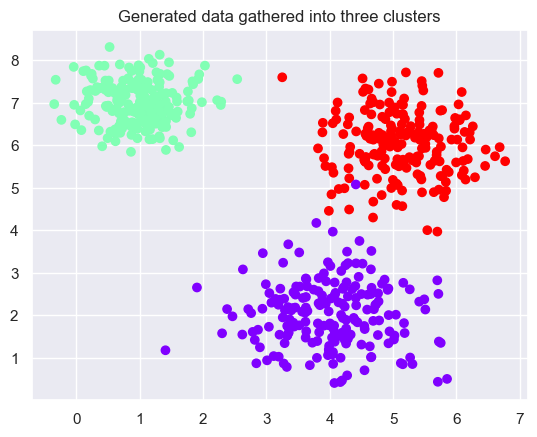

In [10]:
plt.rcParams['font.size'] = 12

# Define cluster centers and standard deviations
centers = [[4, 2], [1, 7], [5, 6]]
cluster_std = [0.8, 0.5, 0.7]

X, labels = make_blobs(n_samples=600, centers=centers, cluster_std=cluster_std, random_state=42)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow' )
plt.title('Generated data gathered into three clusters')
plt.show()

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

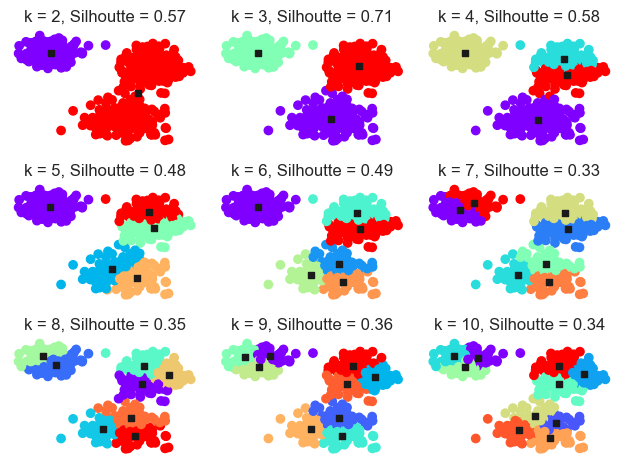

In [29]:
fig, axes = plt.subplots(3,3)
axes = axes.reshape(-1)
k_values = range(2,11)

for k, ax in zip(k_values, axes):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    
    ax.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', marker='s', s=20)
    
    silhoutte = metrics.silhouette_score(X, labels, metric='euclidean')
    ax.set_title(f'k = {k}, Silhoutte = {silhoutte:.2f}')
    ax.axis('off')
                
fig.tight_layout()
plt.show()            

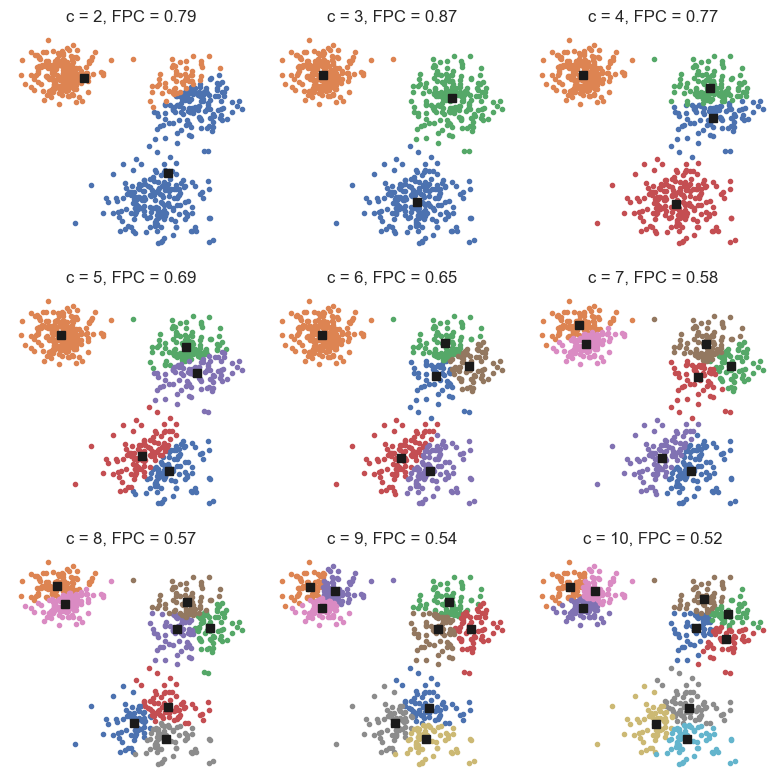

In [46]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((X[:,0], X[:,1]))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, m=2, error=0.005, maxiter=1000, seed=0, init=None)
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(X[:,0][cluster_membership == j],
                X[:,1][cluster_membership == j], '.')
        
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'ks')

    ax.set_title('c = {0}, FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

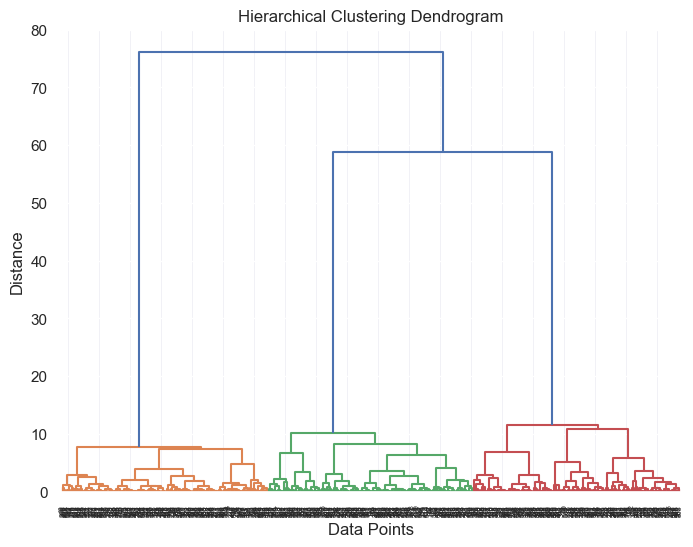

In [49]:

distances = pdist(X)
linkage_matrix = linkage(distances, method='ward')

plt.figure(figsize=(8,6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


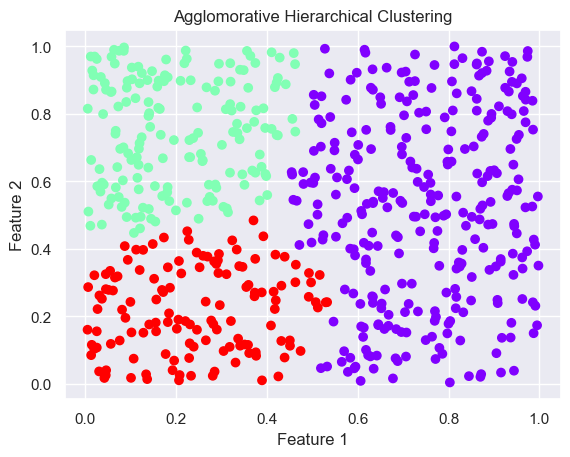

In [58]:
#Agglomorative clustering
np.random.seed(42)
X_synthetic = np.random.rand(600, 2)

n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X_synthetic)

plt.scatter(X_synthetic[:,0], X_synthetic[:,1], c=agg_labels, cmap='rainbow')
plt.title('Agglomorative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


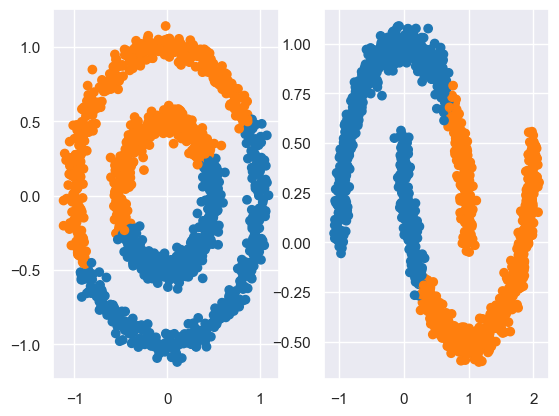

In [69]:
#spherical clustering
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
#X_a = make_blobs(n_samples=1500)
X1 = make_circles(factor = 0.5, noise = 0.05, n_samples=1500)
X2= make_moons(n_samples=1500, noise = 0.05)
fig, ax = plt.subplots(1, 2)
for i,X in enumerate([X1,X2]):
    kmeans = KMeans(n_clusters=2).fit(X[0])
    temp = ['tab:blue' if x!=0 else 'tab:orange' for x in kmeans.labels_]
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=temp)

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


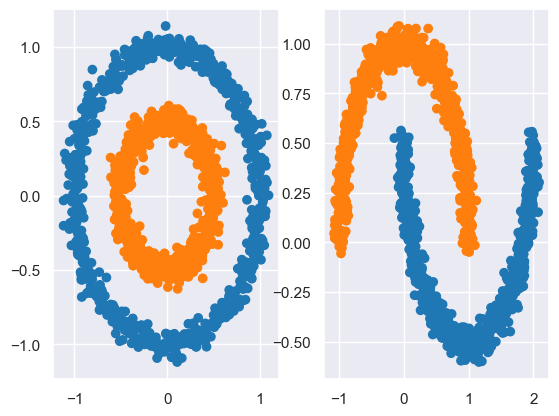

In [79]:
fig, ax = plt.subplots(1,2)
for i, X in enumerate([X1,X2]):
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit(X[0])
    temp = ['tab:blue' if x!=0 else 'tab:orange' for x in spectral.labels_]
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=temp)

array([-0.02547879,  0.32871049,  0.70752546, ..., -0.35282087,
       -0.53508446,  0.08518171])